In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
model = read_sbml_model('iCW773_psilocybin.xml') #Loading the model

No objective coefficients in model. Unclear what should be optimized


In [3]:
#Defining Optimization Target
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.428929662134894

In [4]:
#Flux Scanning Enforced Objective Flux Algorithm
fseof = FSEOF(model)
f_result = fseof.run(target=model.reactions.EX_psi_e) #Defining Flux of Interest (x axis)
frdf = f_result.data_frame

Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$')

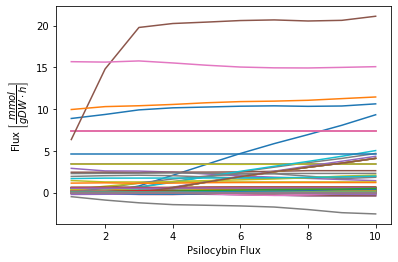

In [5]:
#Plotting FSEOF Results
frdf.T.plot(legend= None) #Legend too big to show
plt.xlabel("Psilocybin Flux")
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")

In [6]:
frdf['RCiF'] = (frdf[10]-frdf[1])/frdf[10] +1 #Adding "Relative Change in Flux" Column
frdf['Slope'] = frdf[10]-frdf[1]/9 #Slope of the flux

In [7]:
frdf.sort_values(by=['Slope'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Slope
CYTBDpp,6.344483,14.796893,19.765623,20.237697,20.407349,20.593325,20.668518,20.540138,20.617364,21.108557,1.699435,20.403614
NADH16pp,15.668103,15.618126,15.757287,15.515916,15.243191,15.025550,14.929919,14.915222,14.986117,15.069604,0.960284,13.328704
CO2tpp,9.939745,10.287943,10.390913,10.546077,10.749321,10.887729,10.944334,11.045224,11.244422,11.440472,1.131177,10.336056
O2tpp,8.866996,9.348759,9.896750,10.142506,10.237050,10.336652,10.380561,10.320427,10.361341,10.617109,1.164839,9.631887
PPA,0.000000,0.000000,0.784898,2.066134,3.378643,4.675027,5.857324,6.934692,8.053104,9.313492,2.000000,9.313492
...,...,...,...,...,...,...,...,...,...,...,...,...
HSDy,-0.230063,-0.207290,-0.184517,-0.161744,-0.138971,-0.116198,-0.118696,-0.179187,-0.254740,-0.254740,1.096871,-0.229177
METt2rpp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025271,-0.108535,-0.206861,-0.229634,2.000000,-0.229634
PGAMT,-0.055886,-0.050351,-0.044817,-0.129636,-0.212733,-0.264536,-0.328765,-0.390605,-0.393212,-0.395818,1.858809,-0.389608
ACGAM1Ptex,0.000000,0.000000,0.000000,-0.090354,-0.178986,-0.236323,-0.306087,-0.373462,-0.381603,-0.389744,2.000000,-0.389744


In [8]:
target_reactions = frdf.loc[(frdf['Slope'] > 0.2) & (frdf['RCiF'] > 1.85)] #Selecting Reactions with a change above 85.00 % and a positive slope
target_reactions.sort_values(by=['Slope'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Slope
PPA,0.000000,0.000000,0.784898,2.066134,3.378643,4.675027,5.857324,6.934692,8.053104,9.313492,2.000000,9.313492
ADK1,0.507984,0.457693,0.619008,1.225021,1.894529,2.542815,3.142029,3.724429,4.341546,5.023355,1.898876,4.966912
GLNS,0.542396,0.549777,0.661622,1.296267,1.896527,2.468337,3.038444,3.575999,4.088021,4.677327,1.884037,4.617061
NDPK1,0.119356,0.107558,0.095760,0.639886,1.311271,1.945104,2.554341,3.162489,3.746480,4.332203,1.972449,4.318941
NTPP11,0.000000,0.000000,0.000000,0.555924,1.239107,1.884738,2.480501,3.017184,3.514646,4.089393,2.000000,4.089393
GTPHs,0.000000,0.000000,0.000000,0.555924,1.239107,1.884738,2.480501,3.017184,3.514646,4.089393,2.000000,4.089393
GMPS2,0.024155,0.021763,0.019371,0.572902,1.253693,1.896932,2.490303,3.024593,3.519664,4.092019,1.994097,4.089335
GK1,0.024155,0.021763,0.019371,0.572902,1.253693,1.896932,2.490303,3.024593,3.519664,4.092019,1.994097,4.089335
NADPHQR2,0.000000,0.542770,1.138408,1.618912,1.970865,2.214198,2.247847,1.959130,1.661149,1.829078,2.000000,1.829078
GLUTRS,0.000000,0.000000,0.079672,0.161297,0.242922,0.299706,0.354079,0.390408,0.412690,0.497933,2.000000,0.497933


In [9]:
tr1 = target_reactions.drop(labels='RCiF', axis=1) #Removing RCiF column
tr2 = tr1.drop(labels='Slope', axis=1) #Removing Slope column

Text(0.5, 1.02, 'Reactions with a Relative Change in Flux > 85.0 %')

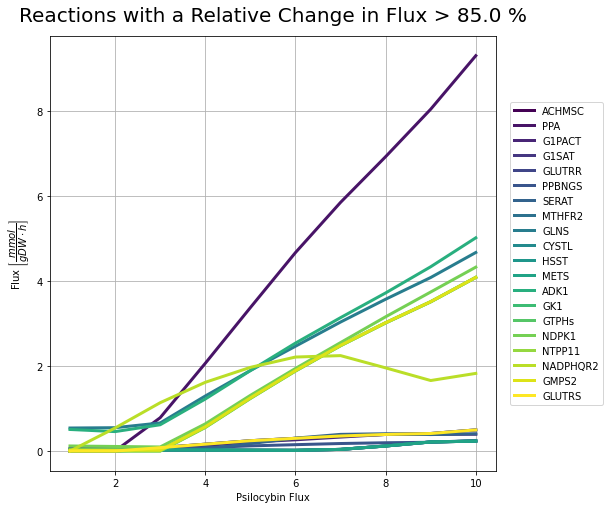

In [10]:
#Plotting depured data frame
fig2 = tr2.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
fig2.set_xlabel("Psilocybin Flux")
fig2.set_ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")
fig2.set_title('Reactions with a Relative Change in Flux > 85.0 %', size=20, y= 1.02)

In [11]:
Reactions = tr2.index.values.tolist()
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction)

ACHMSC    ACHMSC    achms_c + cys_L_c --> ac_c + cyst_L_c + h_c
PPA    inorganic diphosphatase    h2o_c + ppi_c --> h_c + 2.0 pi_c
G1PACT    glucosamine-1-phosphate N-acetyltransferase    accoa_c + gam1p_c --> acgam1p_c + coa_c + h_c
G1SAT    glutamate-1_Semialdehyde aminotransferase    glu1sa_c --> 5aop_c
GLUTRR    glutamyL_tRNA reductase    glutrna_c + h_c + nadph_c --> glu1sa_c + nadp_c + trnaglu_c
PPBNGS    porphobilinogen synthase    2.0 5aop_c --> 2.0 h2o_c + h_c + ppbng_c
SERAT    serine O-acetyltransferase    accoa_c + ser_L_c --> acser_c + coa_c
MTHFR2     5,10_Methylenetetrahydrofolate reductase (NADH)    2.0 h_c + mlthf_c + nadh_c --> 5mthf_c + nad_c
GLNS    glutamine synthetase    atp_c + glu_L_c + nh4_c --> adp_c + gln_L_c + h_c + pi_c
CYSTL    cystathionine b_Lyase    cyst_L_c + h2o_c --> hcys_L_c + nh4_c + pyr_c
HSST    homoserine O-acetyltransferase    accoa_c + hom_L_c --> achms_c + coa_c
METS    methionine synthase    5mthf_c + hcys_L_c --> h_c + met_L_c + thf_c
ADK1 

In [12]:
with model:    
    print("Normal Growth Conditions")
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin Production Rate")
    print(model.slim_optimize())

Normal Growth Conditions
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin Production Rate
5.69299883708285e-05


In [13]:
with model:
    model.reactions.ACHMSC.knock_out()
    print("Without", model.reactions.ACHMSC.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without ACHMSC
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [14]:
with model:
    model.reactions.PPA.knock_out()
    print("Without", model.reactions.PPA.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without inorganic diphosphatase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [15]:
with model:
    model.reactions.G1PACT.knock_out()
    print("Without", model.reactions.G1PACT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glucosamine-1-phosphate N-acetyltransferase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [16]:
with model:
    model.reactions.G1SAT.knock_out()
    print("Without", model.reactions.G1SAT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamate-1_Semialdehyde aminotransferase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [17]:
with model:
    model.reactions.GLUTRR.knock_out()
    print("Without", model.reactions.GLUTRR.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamyL_tRNA reductase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [18]:
with model:
    model.reactions.PPBNGS.knock_out()
    print("Without", model.reactions.PPBNGS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without porphobilinogen synthase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [19]:
with model:
    model.reactions.SERAT.knock_out()
    print("Without", model.reactions.SERAT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without serine O-acetyltransferase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [20]:
with model:
    model.reactions.MTHFR2.knock_out()
    print("Without", model.reactions.MTHFR2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without  5,10_Methylenetetrahydrofolate reductase (NADH)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [21]:
with model:
    model.reactions.GLNS.knock_out()
    print("Without", model.reactions.GLNS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamine synthetase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [22]:
with model:
    model.reactions.CYSTL.knock_out()
    print("Without", model.reactions.CYSTL.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without cystathionine b_Lyase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [23]:
with model:
    model.reactions.HSST.knock_out()
    print("Without", model.reactions.HSST.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without homoserine O-acetyltransferase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [24]:
with model:
    model.reactions.METS.knock_out()
    print("Without", model.reactions.METS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without methionine synthase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [25]:
with model:
    model.reactions.ADK1.knock_out()
    print("Without", model.reactions.ADK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without adenylate kinase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [26]:
with model:
    model.reactions.GK1.knock_out()
    print("Without", model.reactions.GK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without guanylate kinase (GMP:ATP)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [27]:
with model:
    model.reactions.GTPHs.knock_out()
    print("Without", model.reactions.GTPHs.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without GTP amine hydrolysis (spontaneous)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [28]:
with model:
    model.reactions.NDPK1.knock_out()
    print("Without", model.reactions.NDPK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without nucleoside_Diphosphate kinase (ATP:GDP)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [29]:
with model:
    model.reactions.NTPP11.knock_out()
    print("Without", model.reactions.NTP11.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without nucleoside-triphosphatase (dITP)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [30]:
with model:
    model.reactions.NADPHQR2.knock_out()
    print("Without", model.reactions.NADPHQR2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without NADPH Quinone Reductase (Ubiquinone-8)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [31]:
with model:
    model.reactions.GMPS2.knock_out()
    print("Without", model.reactions.GMPS2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without GMP synthase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [32]:
with model:
    model.reactions.GLUTRS.knock_out()
    print("Without", model.reactions.GLUTRS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamyL_tRNA synthetase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [33]:
# Overexpression of all targets identified within FSEOF
psi_production = [] #creating empty list to store 
for reaction_id in Reactions:
   with model:
        model.objective = model.reactions.EX_psi_e # setting objective to our product
        model.reactions.get_by_id(reaction_id).lower_bound = model.reactions.get_by_id(reaction_id).upper_bound # forcing the model to overexpress the respective reaction
        print(reaction_id, model.optimize().objective_value)
        psi_production.append(model.optimize().objective_value) # saving the computed psilocybin production to the list psi_prod


ACHMSC 0.56609314274949
PPA 0.019372413200405142


C:\Users\fjarios\Anaconda3\envs\carveme_ex5\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


G1PACT 5.69299883708285e-05
G1SAT 5.69299883708285e-05
GLUTRR 5.69299883708285e-05
PPBNGS 5.69299883708285e-05
SERAT 0.0
MTHFR2 0.2830465713747456
GLNS 0.019372413200434896
CYSTL 0.28304657137474565
HSST 0.28304657137474565
METS 0.28304657137474565
ADK1 5.69299883708285e-05
GK1 0.30995861120650414
GTPHs 0.019372413201725752
NDPK1 5.69299883708285e-05
NTPP11 0.30995861120740653
NADPHQR2 0.7830517965988405
GMPS2 0.3099586112062964
GLUTRS 5.69299883708285e-05


In [34]:
react_id = [] 
react_name = []

for react in Reactions: 
    with model: 
        model.objective = model.reactions.EX_psi_e
        react_id.append(model.reactions.get_by_id(react).id) #saving reaction_ids to react_id
        react_name.append(model.reactions.get_by_id(react).name) #saving react_names to list react_name



In [35]:
import pandas as pd # importing pandas to enable work with dataframes
for react in Reactions:
    with model: 

        data = {'reaction_id': react_id,
            'reaction_name': react_name,
            'psilocybin_production [mmol/gDW*h], when over-produced': psi_production,        
            }

        df = pd.DataFrame(data) # saving everything to dataframe
df

,reaction_id,reaction_name,"psilocybin_production [mmol/gDW*h], when over-produced"
0,ACHMSC,ACHMSC,0.566093
1,PPA,inorganic diphosphatase,0.019372
2,G1PACT,glucosamine-1-phosphate N-acetyltransferase,0.000057
3,G1SAT,glutamate-1_Semialdehyde aminotransferase,0.000057
4,GLUTRR,glutamyL_tRNA reductase,0.000057
5,PPBNGS,porphobilinogen synthase,0.000057
6,SERAT,serine O-acetyltransferase,0.000000
7,MTHFR2,"5,10_Methylenetetrahydrofolate reductase (NADH)",0.283047
8,GLNS,glutamine synthetase,0.019372
9,CYSTL,cystathionine b_Lyase,0.283047
